In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import pandas as pd
import json

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_json('./data/train.json')
test_data = pd.read_json('./data/test.json')

train_data['seperated_ingredients'] = train_data['ingredients'].apply(','.join)
test_data['seperated_ingredients'] = test_data['ingredients'].apply(','.join)

In [4]:
train_data.head()

,cuisine,id,ingredients,seperated_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce,black olives,grape tomatoes,ga..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomatoes,ground..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,indian,22213,"[water, vegetable oil, wheat, salt]","water,vegetable oil,wheat,salt"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallots,cornflour,cayenne pepper..."


In [6]:
test_data.head()

,id,ingredients,seperated_ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi...","baking powder,eggs,all-purpose flour,raisins,m..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...","sugar,egg yolks,corn starch,cream of tartar,ba..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil...","sausage links,fennel bulb,fronds,olive oil,cub..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,...","meat cuts,file powder,smoked sausage,okra,shri..."
4,35687,"[ground black pepper, salt, sausage casings, l...","ground black pepper,salt,sausage casings,leeks..."


In [ ]:
sns.distplot(train_data['ingredients'])

In [5]:
label = LabelEncoder()
train_data['cusine_code'] = label.fit_transform(train_data['cuisine'])

In [7]:
train_data.head()

,cuisine,id,ingredients,seperated_ingredients,cusine_code
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce,black olives,grape tomatoes,ga...",6
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomatoes,ground...",16
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cooking oil,green c...",4
3,indian,22213,"[water, vegetable oil, wheat, salt]","water,vegetable oil,wheat,salt",7
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallots,cornflour,cayenne pepper...",7


In [40]:
print(len(train_data['cuisine'].unique()), train_data['cuisine'].unique())

20 ['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


Text(0.5,1,'Cuisine Distribution')

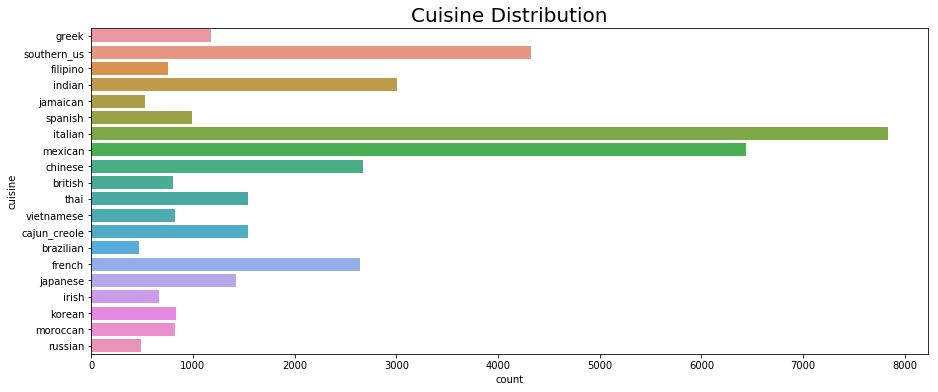

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(y='cuisine', data=train_data,)
plt.title('Cuisine Distribution',size=20)

In [29]:
train_data.isnull().sum()

cuisine                  0
id                       0
ingredients              0
seperated_ingredients    0
dtype: int64

In [30]:
test_data.isnull().sum()

id                       0
ingredients              0
seperated_ingredients    0
dtype: int64

In [30]:
ingredients_dict = {}
def get_unique_set(ings):
    for ing in ings: 
        if ing in ingredients_dict: 
            ingredients_dict[ing] += 1
        else: 
            ingredients_dict[ing] = 1
        
def get_all_ingredients():
    train_data['ingredients'].map(lambda x: get_unique_set(x))
get_all_ingredients()

In [32]:
print(len(ingredients_dict))

6714


In [24]:
train_data.head()

,cuisine,id,ingredients,seperated_ingredients,cusine_code,test_
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce,black olives,grape tomatoes,ga...",6,0
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomatoes,ground...",16,0
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cooking oil,green c...",4,0
3,indian,22213,"[water, vegetable oil, wheat, salt]","water,vegetable oil,wheat,salt",7,0
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallots,cornflour,cayenne pepper...",7,0


In [84]:
ingredients_df = pd.DataFrame(ingredients_dict, columns={'ingredients', 'count'})
ingredients_df['ingredients'] = ingredients_dict.keys()
ingredients_df['count'] = ingredients_df['ingredients'].map(lambda x: ingredients_dict[x])
ingredients_df = ingredients_df.sort_values(by=['count'], ascending=False)

In [89]:
ingredients_df.head()

,ingredients,count
11,salt,18049
54,olive oil,7972
35,onions,7972
29,water,7457
3,garlic,7380


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

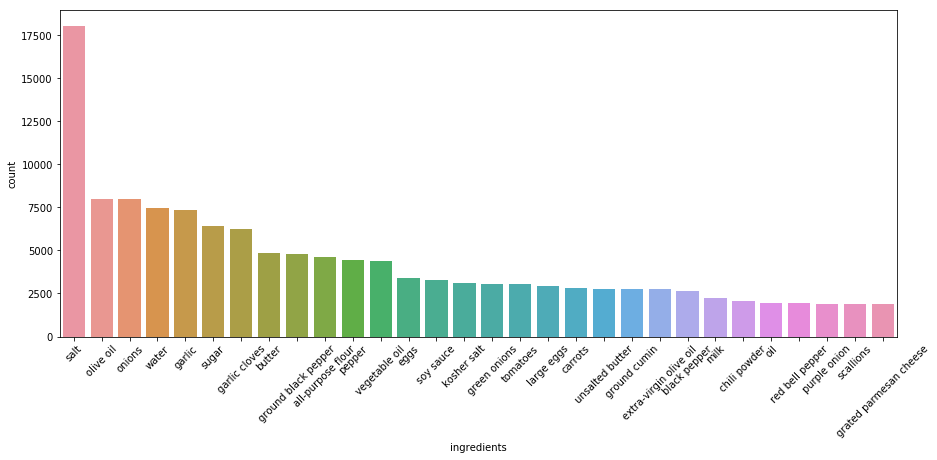

In [95]:
plt.figure(figsize=(15,6))
sns.barplot(x='ingredients', y='count', data=ingredients_df.head(30))
plt.xticks(rotation=45)

In [102]:
ingredinets_keys_df = pd.DataFrame(columns=ingredients_df['ingredients'], index=range(len(train_data)))

In [104]:
ingredinets_keys_df.head()

ingredients,salt,olive oil,onions,water,garlic,sugar,garlic cloves,butter,ground black pepper,all-purpose flour,...,whole garam masala,rose hip tea bags,small potatoes,cherry syrup,frozen fruit,sauerkraut juice,no-calorie sweetener,Bob Evans Italian Sausage,extra firm silken tofu,crushed cheese crackers
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
ingredinets_keys_df.tail()

ingredients,salt,olive oil,onions,water,garlic,sugar,garlic cloves,butter,ground black pepper,all-purpose flour,...,whole garam masala,rose hip tea bags,small potatoes,cherry syrup,frozen fruit,sauerkraut juice,no-calorie sweetener,Bob Evans Italian Sausage,extra firm silken tofu,crushed cheese crackers
39769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
for ing in ingredinets_keys_df.columns:
    train_data['ingredients'].map(lambda x: 1 if ing in x else 0)

KeyboardInterrupt: 

In [ ]:
ingredinets_keys_df.tail()